In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


# from sklearn.preprocessing import MinMaxScaler        # For normalizing data (feature scaling)

In [48]:
# get the data, read csv
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)

In [50]:
# preprocess the data
data = data.dropna()                                  # drop missing values
#drop duplicates
data = data.drop_duplicates(subset=['Date'], keep=False)
data = data.sort_values(by=['Date'])                   # sort by date
data = data.reset_index(drop=True)                     # reset index

# Convert date to numerical representation
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].apply(lambda x: datetime.toordinal(x))

In [51]:
# analyze the data
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,733974,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,733975,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,733976,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,733979,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,733980,117.6,119.50,112.00,118.80,118.65,586100,694.98


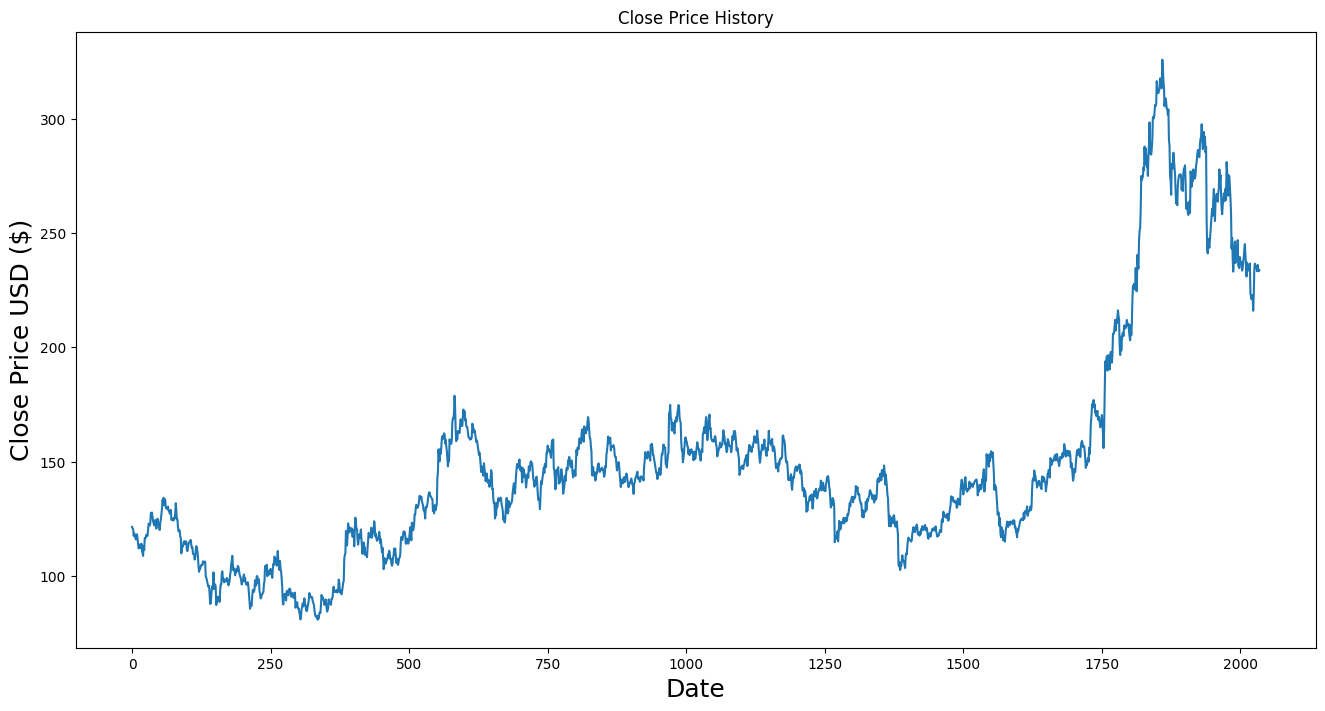

In [52]:
# plot in graph
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [68]:
# create X and y
X = data.iloc[:, :-2]                  # all rows, all columns except last column
y = data.iloc[:, -2:]                  # all rows, last column

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [69]:
print(X_train.shape, X_test.shape)
print(X_train.head())

(1628, 6) (407, 6)
        Date    Open    High     Low    Last  Close
1605  736334  124.75  125.65  124.55  125.30  125.2
1686  736457  152.80  154.15  151.95  152.45  152.6
1752  736550  165.50  166.90  160.45  161.00  162.1
745   735059  145.80  149.80  145.55  149.20  149.1
1335  735935  136.10  136.80  134.20  134.90  134.9


In [70]:
y_train.head()

,Total Trade Quantity,Turnover (Lacs)
1605,503565,630.23
1686,1239593,1897.26
1752,1267995,2082.83
745,2518478,3726.49
1335,689892,932.10


In [71]:
# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred = model.predict(X_test)

In [73]:
# accuracy
print('Accuracy: ', model.score(X_test, y_test))

Accuracy:  0.6106921015910164


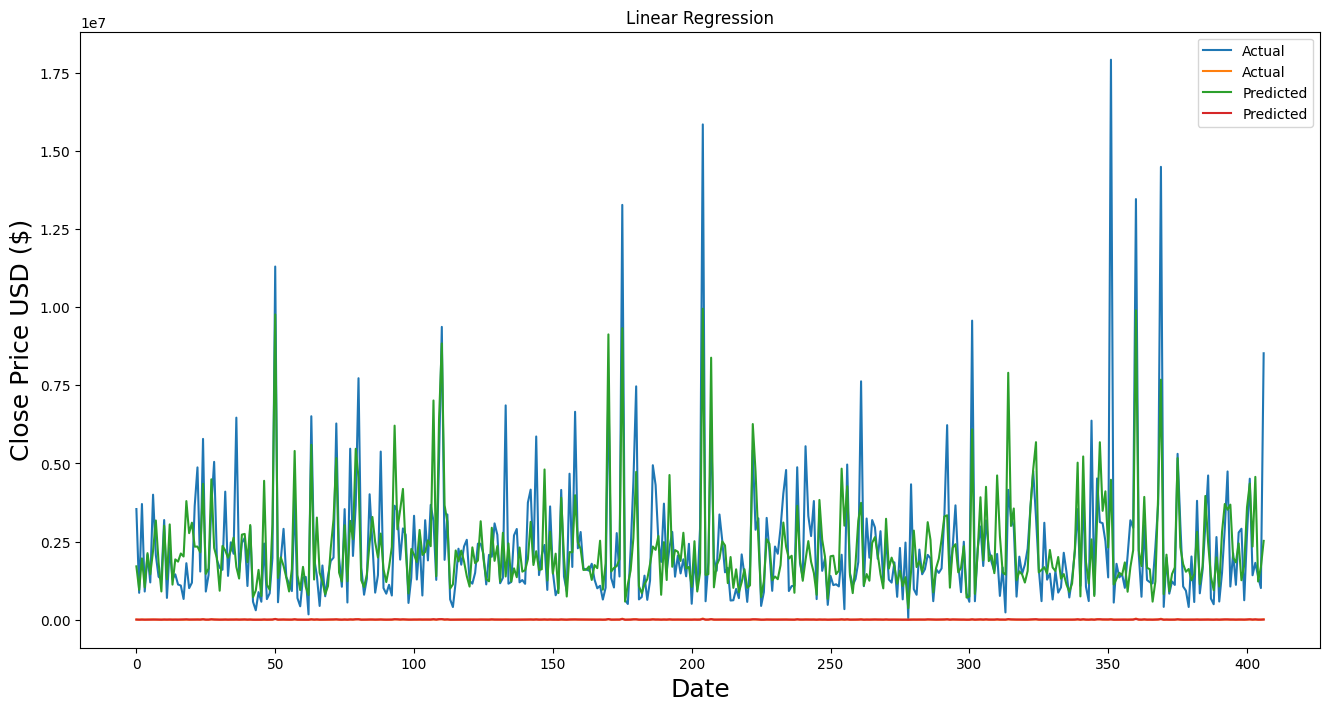

In [74]:
# graph of y_test vs y_pred
plt.figure(figsize=(16,8))
plt.title('Linear Regression')
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


Above model is overfitting. We need to use CV and try w that. 

In [75]:
# make a cross validation set
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)


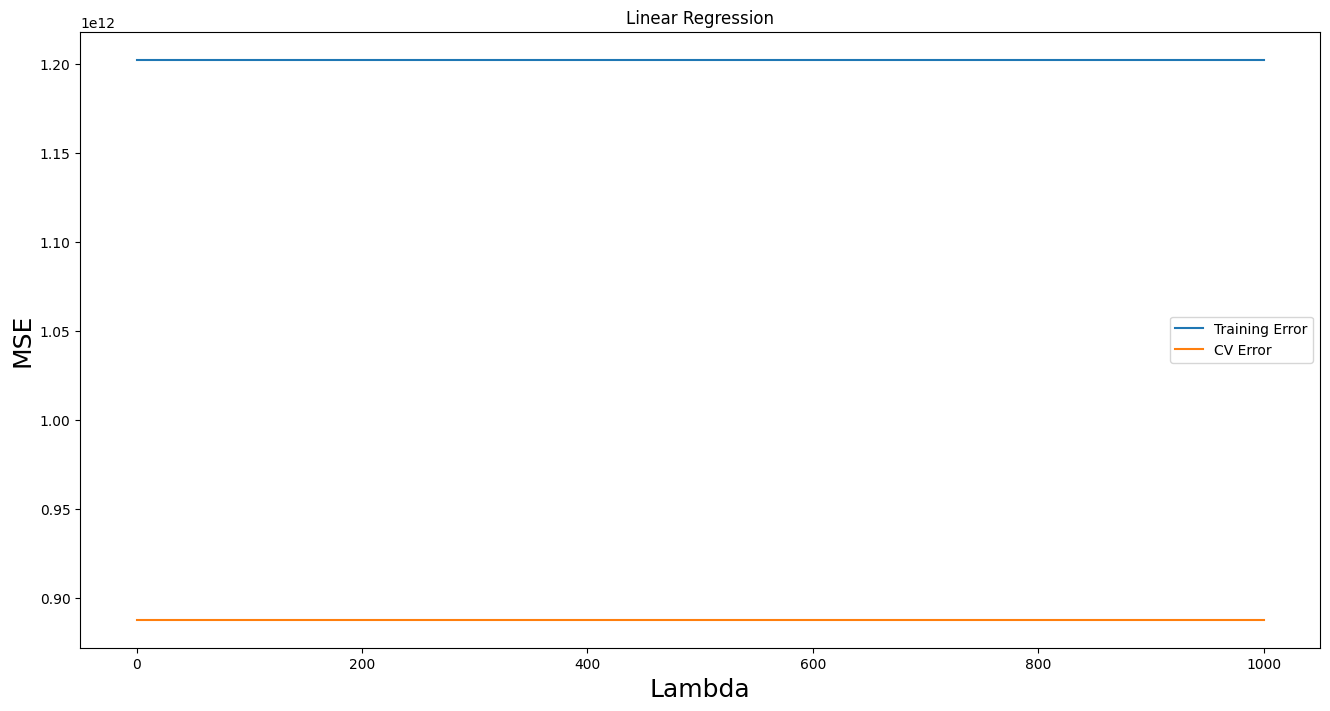

In [76]:
# lambda values
lambdas = [0.01, 0.1, 1, 10, 100, 1000]
# train on different lambdas
train_errors = []
cv_errors = []
for l in lambdas:
    # create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # predict on train and cv
    y_train_pred = model.predict(X_train)
    y_cv_pred = model.predict(X_cv)
    # calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    cv_error = mean_squared_error(y_cv, y_cv_pred)
    # append to list
    train_errors.append(train_error)
    cv_errors.append(cv_error)

# plot the errors
plt.figure(figsize=(16,8))
plt.title('Linear Regression')
plt.plot(lambdas, train_errors, label='Training Error')
plt.plot(lambdas, cv_errors, label='CV Error')
plt.xlabel('Lambda', fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.legend()
plt.show()


Since the 